# Import the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("train_autopilot.csv")
X = train_data.values[:,:-1]
Y = train_data.values[:,-1]


# Define Functions

In [3]:

def fit(X, y):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)    
    
    # Closed Form Equation
    weights = np.matmul(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
    
    return weights    

def polynomial_transform(X, degrees):
    
    t = X.copy()
    
    # Appending Polynomial Features to X.
    for i in range(2,degrees+1):
        X = np.append(X, t**i, axis=1)
            
    return X

def predict(X,weights):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # y_pred is y_hat which is the dot product of X and weights.
    y_pred = np.dot(X, weights)
    
    return y_pred


* Fit the model on training data using Polynomial Features M = 1,2,3,4,5,6
* predict the target values
* Compute Root Mean Square Error on Training Data

In [4]:
degrees = [i for i in range(1,7)]
training_errors = []
Weight_vector = dict()
Predictions = dict()

print("Root Mean Square Errors on Training Data :---")

for pow in degrees:
    X = train_data.values[:,:-1]
    
    if pow!=1:
        X = polynomial_transform(X,pow)
    weights = fit(X, Y)
    Weight_vector[str(pow)] = weights
    
    y_pred = predict(X,weights)
    Predictions[str(pow)] = y_pred
    
    root_mse = np.sqrt(np.mean((Y-y_pred)**2))
    training_errors.append(root_mse)
    print(" -> for M = %d : %.2f" % (pow,root_mse))

Root Mean Square Errors on Training Data :---
 -> for M = 1 : 14.30
 -> for M = 2 : 14.22
 -> for M = 3 : 14.15
 -> for M = 4 : 14.13
 -> for M = 5 : 14.06
 -> for M = 6 : 14.65


# Visualize Training error against Polynomial Features

Text(0.5, 1.0, 'Polynomial Features Vs Training error')

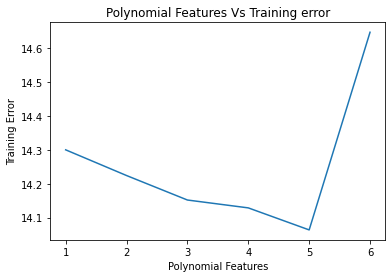

In [5]:
plt.plot(degrees,training_errors)
plt.xlabel("Polynomial Features")
plt.ylabel("Training Error")
plt.title("Polynomial Features Vs Training error")

# Predict the Test Dataset and compute Test error

In [6]:
test_data = pd.read_csv("test_autopilot.csv")
X_test = test_data.values[:,:-1]
Y_test = test_data.values[:,-1]

degrees = [i for i in range(1,7)]
test_errors = []

print("Root Mean Square Errors on Test Data :---")

for pow in degrees:
    X_test = test_data.values[:,:-1]
    
    if pow!=1:
        X_test = polynomial_transform(X_test,pow)
    y_pred = predict(X_test,Weight_vector[str(pow)])
    
    root_mse = np.sqrt(np.mean((Y_test-y_pred)**2))
    test_errors.append(root_mse)
    print(" -> for M = %d : %.2f" % (pow,root_mse))

Root Mean Square Errors on Test Data :---
 -> for M = 1 : 14.82
 -> for M = 2 : 14.84
 -> for M = 3 : 14.74
 -> for M = 4 : 22.24
 -> for M = 5 : 68.55
 -> for M = 6 : 374.54


# Visualize Test Error Against Polynomial Features

Text(0.5, 1.0, 'Polynomial Features Vs Test error')

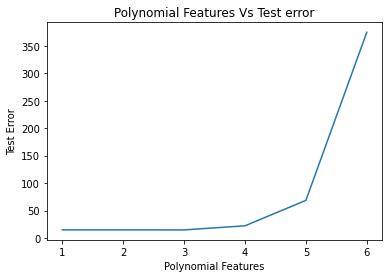

In [7]:
plt.plot(degrees,test_errors)
plt.xlabel("Polynomial Features")
plt.ylabel("Test Error")
plt.title("Polynomial Features Vs Test error")

# Compare Training Error & Test Error Against Polynomial Features

(0.0, 100.0)

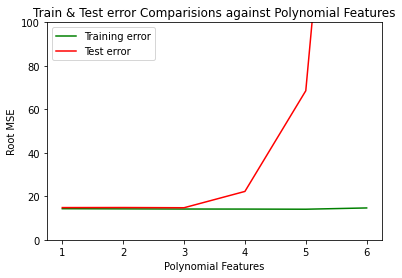

In [8]:
plt.plot(degrees,training_errors,color='green')
plt.plot(degrees,test_errors,color='red')
plt.legend(['Training error','Test error'])
plt.xlabel("Polynomial Features")
plt.ylabel("Root MSE")
plt.title("Train & Test error Comparisions against Polynomial Features")
plt.ylim(0,100)